### cutting edge

couldnt find any simple task for cutting edge techniques, so lets try computer vision

In [94]:
import pandas as pd
import os
import numpy as np
from PIL import Image

In [95]:
base_dir = "dataset"

paths = []
data_types = []
classes = []

for data_type in ["train", "test", "valid"]:
    data_type_path = os.path.join(base_dir, data_type)

    for class_name in ["daisy", "dandelion"]:
        class_path = os.path.join(data_type_path, class_name)

        image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(".jpg")]

        paths.extend(image_files)
        data_types.extend([data_type] * len(image_files))
        classes.extend([class_name] * len(image_files))

df = pd.DataFrame({"path": paths, "data_type": data_types, "class": classes})

df.head()

,path,data_type,class
0,dataset\train\daisy\100080576_f52e8ee070_n_jpg...,train,daisy
1,dataset\train\daisy\10172379554_b296050f82_n_j...,train,daisy
2,dataset\train\daisy\10172567486_2748826a8b_jpg...,train,daisy
3,dataset\train\daisy\10172636503_21bededa75_n_j...,train,daisy
4,dataset\train\daisy\102841525_bd6628ae3c_jpg.r...,train,daisy


In [96]:
df.describe()

,path,data_type,class
count,1821,1821,1821
unique,1821,3,2
top,dataset\train\daisy\100080576_f52e8ee070_n_jpg...,train,dandelion
freq,1,1275,1052


In [97]:
df.shape

(1821, 3)

In [98]:
target_image_size = (32, 32)

In [99]:
def load_and_preprocess_image(file_path):
    image = Image.open(file_path)
    # Convert the image to a numpy array
    image = image.resize(target_image_size)

    image_array = np.array(image)
    return image_array

In [100]:
X = np.zeros((df.shape[0],target_image_size[0],target_image_size[1], 3), dtype=np.float16)
y = np.zeros((df.shape[0]), dtype=np.float16)
for i, row in df.iterrows():
    X[i] = load_and_preprocess_image(row["path"])
    if row["class"] == "dandelion":
        y[i] = 1
X /= 255

In [101]:
X.shape, y.shape

((1821, 32, 32, 3), (1821,))

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [104]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [105]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(target_image_size[0], target_image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming 2 classes (daisy and dandelion)

In [106]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=[X_valid, y_valid])

Epoch 1/30


47/47 [==============================] - 1s 11ms/step - loss: 0.6371 - accuracy: 0.6275 - val_loss: 0.9433 - val_accuracy: 0.5671
Epoch 2/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6314 - accuracy: 0.6845 - val_loss: 0.5188 - val_accuracy: 0.7561
Epoch 3/30
47/47 [==============================] - 0s 8ms/step - loss: 0.4836 - accuracy: 0.7687 - val_loss: 0.5239 - val_accuracy: 0.7317
Epoch 4/30
47/47 [==============================] - 0s 8ms/step - loss: 0.4305 - accuracy: 0.8046 - val_loss: 0.4342 - val_accuracy: 0.8232
Epoch 5/30
47/47 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.8216 - val_loss: 0.4527 - val_accuracy: 0.7988
Epoch 6/30
47/47 [==============================] - 0s 8ms/step - loss: 0.3753 - accuracy: 0.8358 - val_loss: 0.4873 - val_accuracy: 0.7866
Epoch 7/30
47/47 [==============================] - 0s 8ms/step - loss: 0.3573 - accuracy: 0.8446 - val_loss: 0.4880 - val_accuracy: 0.7805
Epoch 8/30
47/47 [============

In [108]:
import matplotlib.pyplot as plt

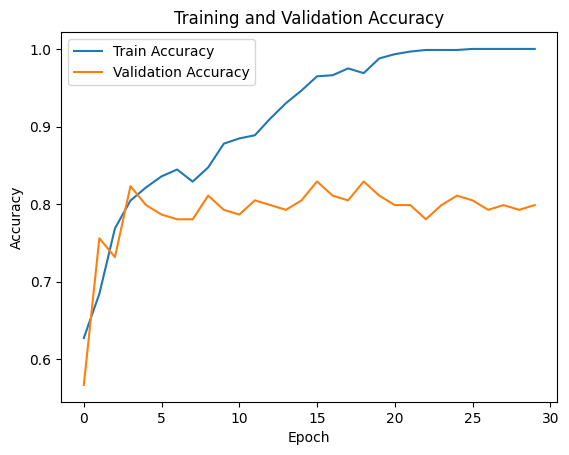

In [109]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
# Save the model
model.save('my_cnn_model.h5')

c:\Users\prixe\Documents\dev\advent-of-data-science-2023\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [112]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

6/6 [==============================] - 0s 3ms/step - loss: 0.8787 - accuracy: 0.8033
Test Loss: 0.8787
Test Accuracy: 80.33%


### Summary

the model was able to get to 80% accuracy on test data, which is not bad considering the input size is only 32x32 and the neural network is not that complex